<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/32_Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중공선성(Multicollinearity)

  feature        VIF
0   const   1.020278
1      X1  73.566862
2      X2  73.493101
3      X3   1.037920


<ipython-input-9-00d60b578937>:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


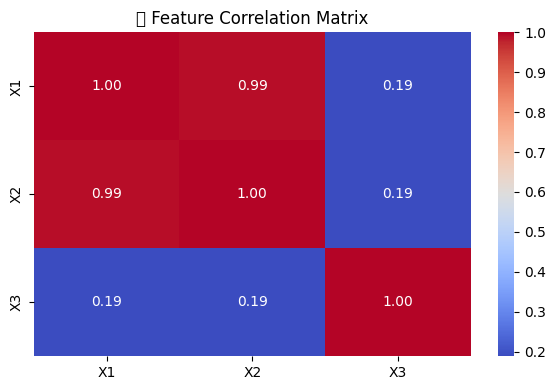

<ipython-input-9-00d60b578937>:44: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


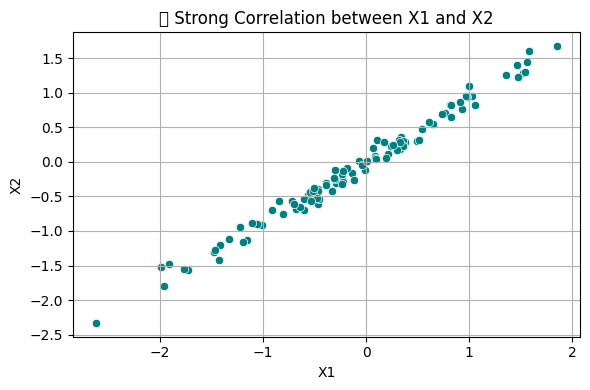

<ipython-input-9-00d60b578937>:56: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


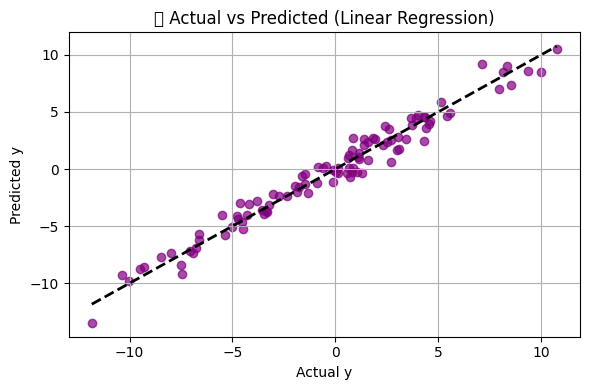

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1️⃣ 데이터 생성
np.random.seed(42)
n = 100
X1 = np.random.normal(0, 1, n)
X2 = 0.9 * X1 + np.random.normal(0, 0.1, n)
X3 = np.random.normal(0, 1, n)
y = 3 * X1 + 2 * X2 + 1.5 * X3 + np.random.normal(0, 1, n)

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# 2️⃣ 회귀 분석
model = LinearRegression()
model.fit(df[['X1', 'X2', 'X3']], df['y'])

# 3️⃣ VIF 계산
X_const = add_constant(df[['X1', 'X2', 'X3']])
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif_data)

# 4️⃣ 시각화: 상관 행렬 (heatmap)
plt.figure(figsize=(6, 4))
sns.heatmap(df[['X1', 'X2', 'X3']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# 5️⃣ 시각화: X1 vs X2 산점도 (다중공선성 확인)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='X1', y='X2', data=df, color='teal')
plt.title("🔍 Strong Correlation between X1 and X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6️⃣ 시각화: 예측값 vs 실제값
y_pred = model.predict(df[['X1', 'X2', 'X3']])
plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, color='purple', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("📈 Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 해석
X1 과 X2 간의 상관계수가 약 0.9 이상 → 다중공선성 존재.

VIF 가 10 이상이면 강한 다중공선성을 의심:

X1 과 X2 의 VIF 값이 10~15 이상이면 해당 변수는 다른 변수로 설명 가능하다는 의미.

회귀 계수가 불안정하게 나타날 수 있으며, 불필요한 변수 제거 또는 정규화 방법(Ridge, Lasso)이 고려됨.



# Ridge, Lasso로 다중공선성 보정하기

<ipython-input-10-a4ab795afce6>:57: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



📌 Variance Inflation Factors (VIF):
  feature         VIF
0   const    1.020278
1      X1  329.724977
2      X2  329.610481
3      X3    1.037920

📌 회귀 계수 비교:
    LinearRegression     Ridge     Lasso
X1          3.549319  2.588699  4.607198
X2          1.235113  2.222235  0.000000
X3          1.526900  1.519092  1.457452
LinearRegression MSE: 0.7493
Ridge MSE: 0.7523
Lasso MSE: 0.7702


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


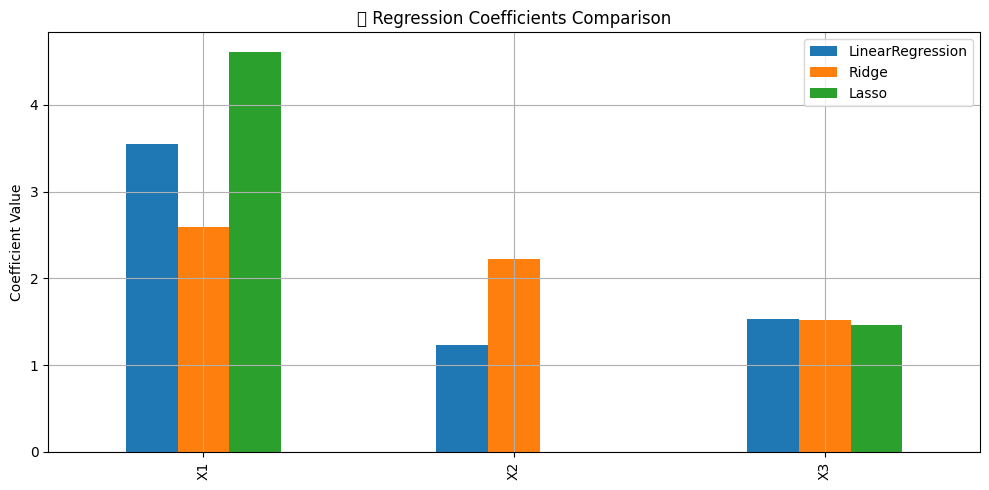

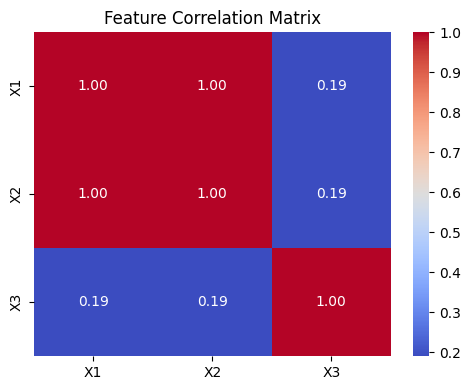

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1️⃣ 데이터 생성 (다중공선성 심한 데이터)
np.random.seed(42)
n = 100
X1 = np.random.normal(0, 1, n)
X2 = 0.95 * X1 + np.random.normal(0, 0.05, n)  # X1과 강한 상관
X3 = np.random.normal(0, 1, n)
y = 3 * X1 + 2 * X2 + 1.5 * X3 + np.random.normal(0, 1, n)

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
X = df[['X1', 'X2', 'X3']]
y = df['y']

# 2️⃣ VIF 계산
X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\n📌 Variance Inflation Factors (VIF):")
print(vif_data)

# 3️⃣ 세 모델 훈련
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=0.1).fit(X, y)

# 4️⃣ 계수 비교
coef_df = pd.DataFrame({
    'LinearRegression': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}, index=['X1', 'X2', 'X3'])

print("\n📌 회귀 계수 비교:")
print(coef_df)

# 5️⃣ 예측 성능 평가
models = {'LinearRegression': lr, 'Ridge': ridge, 'Lasso': lasso}
for name, model in models.items():
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"{name} MSE: {mse:.4f}")

# 6️⃣ 시각화: 계수 비교
coef_df.plot(kind='bar', figsize=(10, 5))
plt.title("🔍 Regression Coefficients Comparison")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7️⃣ 시각화: 상관 행렬
plt.figure(figsize=(5, 4))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


<ipython-input-11-777317c4c1ff>:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


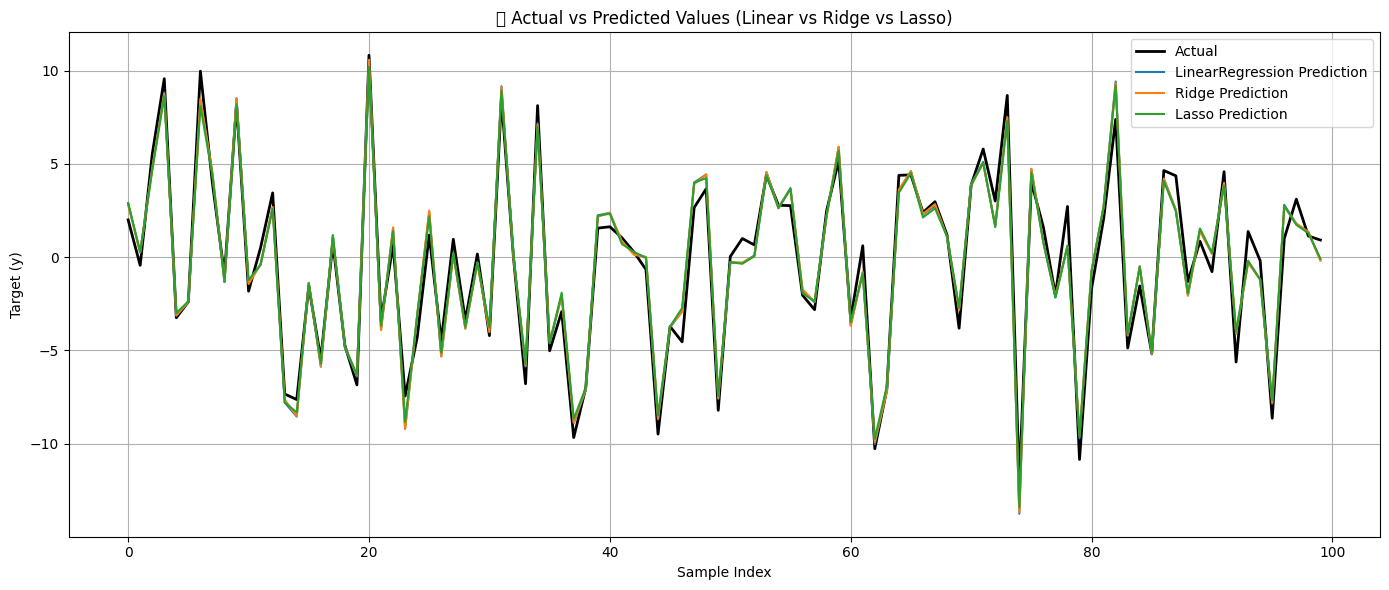

In [ ]:
# 8️⃣ 예측 결과 시각화: 실측값 vs 예측값
plt.figure(figsize=(14, 6))
plt.plot(y.values, label='Actual', color='black', linewidth=2)

for name, model in models.items():
    y_pred = model.predict(X)
    plt.plot(y_pred, label=f"{name} Prediction")

plt.title("📈 Actual vs Predicted Values (Linear vs Ridge vs Lasso)")
plt.xlabel("Sample Index")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Ridge 나 Lasso 는 다중공선성을 제거하지는 못합니다

In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF 계산 함수
def calculate_vif(X):
    X_const = add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                       for i in range(X_const.shape[1])]
    return vif_data

# 원래 입력 변수(X)에 대한 VIF
vif_original = calculate_vif(X)
print("📌 Original Input VIF:")
print(vif_original)

# 정규화
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Ridge/Lasso 모델 후 중요 변수 추출
ridge_model = Ridge(alpha=10).fit(X_scaled, y)
lasso_model = Lasso(alpha=0.1).fit(X_scaled, y)

# 비중요 변수 제거 (예: 계수가 0에 가까운 변수 제거)
ridge_selected = X_scaled.loc[:, np.abs(ridge_model.coef_) > 1e-4]
lasso_selected = X_scaled.loc[:, np.abs(lasso_model.coef_) > 1e-4]

# VIF 계산
vif_ridge = calculate_vif(ridge_selected)
vif_lasso = calculate_vif(lasso_selected)

print("\n📌 Ridge Selected Variable VIF:")
print(vif_ridge)

print("\n📌 Lasso Selected Variable VIF:")
print(vif_lasso)


📌 Original Input VIF:
  Variable         VIF
0    const    1.020278
1       X1  329.724977
2       X2  329.610481
3       X3    1.037920

📌 Ridge Selected Variable VIF:
  Variable         VIF
0    const    1.000000
1       X1  329.724977
2       X2  329.610481
3       X3    1.037920

📌 Lasso Selected Variable VIF:
  Variable         VIF
0    const    1.000000
1       X1  329.724977
2       X2  329.610481
3       X3    1.037920


X1과 X2는 여전히 VIF가 300 이상으로 매우 높습니다.

Ridge는 계수를 축소하지만, 다중공선성 수치는 그대로 유지될 수 있습니다.

Lasso는 계수를 0으로 만들 수 있지만, 완전히 제거되지 않았기에 여전히 포함되어 있고 VIF도 남아 있습니다.

VIF 완화를 원한다면 PCA, Feature Selection (e.g. mutual_info, tree 기반), 도메인 지식 기반 feature pruning 등을 고려해야 합니다.



<ipython-input-13-7c87350831ed>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


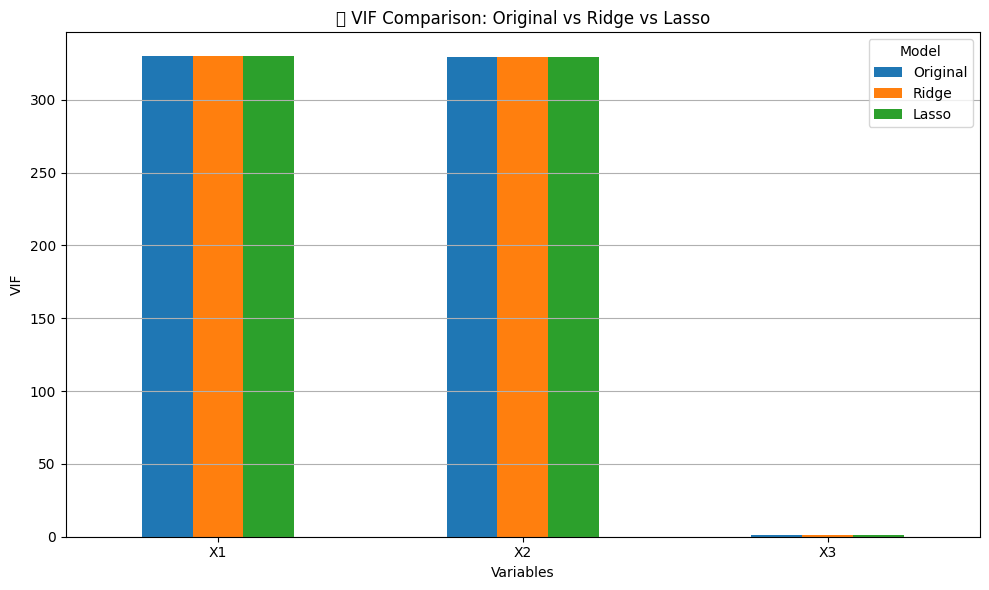

In [ ]:
import matplotlib.pyplot as plt

# 공통 변수 정렬
variables = ['X1', 'X2', 'X3']
vif_data = pd.DataFrame({
    'Original': vif_original.set_index('Variable').loc[variables, 'VIF'],
    'Ridge': vif_ridge.set_index('Variable').loc[variables, 'VIF'],
    'Lasso': vif_lasso.set_index('Variable').loc[variables, 'VIF']
}, index=variables)

# 시각화
vif_data.plot(kind='bar', figsize=(10, 6))
plt.title("📉 VIF Comparison: Original vs Ridge vs Lasso")
plt.xlabel("Variables")
plt.ylabel("VIF")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title="Model")
plt.show()
